In [3]:
import anndata
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import numpy as np
import pandas as pd
import scipy.stats
import scanpy as sc
from scipy.sparse import csr_matrix

In [7]:
import diffxpy.api as de

ModuleNotFoundError: No module named 'diffxpy.api'; 'diffxpy' is not a package

In [4]:
!pip3 show scanpy 

Name: scanpy
Version: 1.9.1
Summary: Single-Cell Analysis in Python.
Home-page: 
Author: Alex Wolf, Philipp Angerer, Fidel Ramirez, Isaac Virshup, Sergei Rybakov, Gokcen Eraslan, Tom White, Malte Luecken, Davide Cittaro, Tobias Callies, Marius Lange, Andrés R. Muñoz-Rojas
Author-email: 
License: 
Location: /opt/homebrew/lib/python3.10/site-packages
Requires: anndata, h5py, joblib, matplotlib, natsort, networkx, numba, numpy, packaging, pandas, patsy, scikit-learn, scipy, seaborn, session-info, statsmodels, tqdm, umap-learn
Required-by: 


In [6]:
# from batchglm.api.models.tf1.glm_nb import Simulator

# sim = Simulator(num_observations=200, num_features=129)
# sim.generate_sample_description(num_batches=0, num_conditions=2)
# sim.generate_params(
#     rand_fn_loc=lambda shape: np.random.uniform(-0.1, 0.1, shape),
#     rand_fn_scale=lambda shape: np.random.uniform(0.1, 2, shape)
# )
# sim.generate_data()

# data = anndata.AnnData(
#     X=sim.x,
#     var=pd.DataFrame(index=["gene" + str(i) for i in range(sim.x.shape[1])]),
#     obs=sim.sample_description
# )

# print('Original adata shape:',data.shape)
# adata_temp=anndata.concat([data,data],axis=1)
# adata_temp.var_names_make_unique()
# print('Modified adata shape:',adata_temp.shape)

adata = sc.read("./dataSaveOriginal/rawDataset.h5ad") # ./dataSaveOriginal/rawDataset5000.h5ad
realAdata = sc.read("./dataSaveOriginal/rawDataset5000.h5ad") # ./dataSaveOriginal/rawDataset5000.h5ad
adata.var_names_make_unique()


In [5]:
adata.X = csr_matrix(adata.X)

adata.X = adata.X.todense()

adata.obs
adata.obs = adata.obs.rename(columns = {'group':'condition'})
adata.obs

realAdata.X = csr_matrix(realAdata.X)

realAdata.X = realAdata.X.todense()

realAdata.obs
realAdata.obs = realAdata.obs.rename(columns = {'group':'condition'})
realAdata.obs

NameError: name 'adata' is not defined

In [ ]:
data = anndata.AnnData(
  X=adata.X,
  var=adata.var,
  obs=adata.obs
)

realData = anndata.AnnData(
  X=realAdata.X,
  var=realAdata.var,
  obs=realAdata.obs
)


/var/folders/f2/tr4hpwss57b952qwypb78gb40000gn/T/ipykernel_10473/246624501.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  data = anndata.AnnData(
/var/folders/f2/tr4hpwss57b952qwypb78gb40000gn/T/ipykernel_10473/246624501.py:7: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  realData = anndata.AnnData(


In [ ]:
sc.pp.highly_variable_genes(data, n_top_genes=255, subset = True,
                           flavor = "seurat_v3", batch_key="sample")

In [ ]:
data

AnnData object with n_obs × n_vars = 5000 × 255
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'sample', 'percentMito', 'percent_reads_top50', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'clust_orig', 'clust_orig_lab', 'clust_recl', 'integrated_snn_res.0.8', 'cluster_type'
    var: 'features', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg'

In [ ]:
test = de.test.wald(
    data=data,
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
)

134217728
training location model: False
training scale model: True
iter   0: ll=1096223.271060
iter   1: ll=1096223.271060, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=1085661.387349, converged: 0.00% (loc: 0.00%, scale update: True), in 1.45sec
iter   3: ll=1085661.387349, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=1085661.387349, converged: 100.00% (loc: 100.00%, scale update: True), in 1.30sec
134217728
134217728


In [ ]:
test.qval[:10]

array([9.77341604e-02, 0.00000000e+00, 1.11813266e-03, 8.68548289e-12,
       1.45326409e-08, 3.10905219e-08, 9.53126467e-13, 4.03117472e-02,
       6.17196033e-01, 2.87238316e-01])

In [ ]:
sumar = test.summary().iloc[:10,:]

In [ ]:
sumar.sort_values(['pval'], ascending = [True])

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
1,ID3,0.000000e+00,0.000000e+00,1.276333,0.7970,False,4.648609e-08,1.276333,0.122041,-3672.492538
8,AL583808.1,0.000000e+00,0.000000e+00,-1.891461,0.1652,False,6.880198e-09,-1.891461,0.177367,-1536.661564
6,WLS,1.569855e-13,9.309607e-13,0.598065,1.1078,False,1.911685e-08,0.598065,0.081027,-5750.213114
3,AC099792.1,1.634914e-12,8.508228e-12,-0.692845,0.3892,False,5.851183e-08,-0.692845,0.098101,-3367.394303
4,NFIA,4.103334e-09,1.413987e-08,0.434550,3.1698,False,1.181461e-07,0.434550,0.073903,-8818.485585
5,NFIA-AS2,9.022348e-09,3.027235e-08,-1.130609,0.2454,False,1.482453e-08,-1.130609,0.196691,-1616.292144
2,CDC20,5.959712e-04,1.101928e-03,-0.518407,0.3492,False,1.299571e-09,-0.518407,0.150988,-2356.602657
9,LHX8,2.877152e-02,3.987358e-02,-1.225243,0.0208,False,1.025303e-09,-1.225243,0.560341,-240.914699
0,HES5,7.627097e-02,9.628266e-02,0.126113,4.4770,False,6.415936e-08,0.126113,0.071140,-9967.616224
7,AL513166.1,3.699237e-01,4.230069e-01,0.068797,0.5434,False,6.332140e-08,0.068797,0.076729,-4462.309160


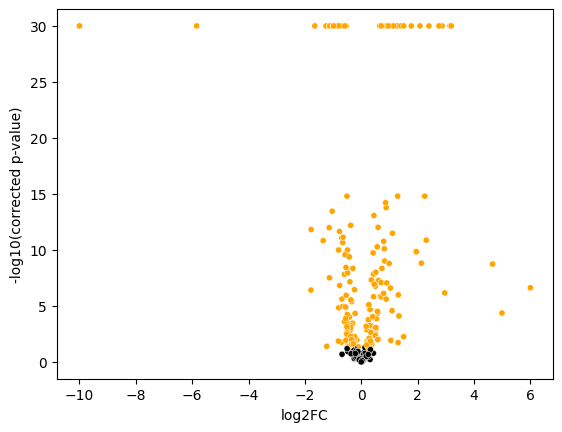

In [ ]:
test.plot_volcano(corrected_pval=True, min_fc=1.05, alpha=0.05, size=20)